# Google Gemini Vision

## What are Multimodal LLMs?

Current LLMs mainly focus on text-based interactions which means we are using only single mode of input and output. Multimodal LLMs are expanding the boundaries of current LLMs by allowing us to give inputs beyond text that is image, video, audio, etc. and we can get outputs not only text but image, video, or audio.

In the past, distinct models were designed for specific media types, such as Imagen, DALL-E, and Stability Diffusion for generating images from text prompts. Simultaneously, dedicated audio models like OpenAI’s Whisper excelled at understanding audio content and generating concise summaries. The landscape has evolved, ushering in a new era of unified models capable of seamlessly handling diverse tasks across multiple mediums. Examples include OpenAI’s ChatGPT-4 and Google’s Gemini, marking a significant leap towards comprehensive AI frameworks that transcend traditional media-centric boundaries.

## Image Prompting Based Use – Cases

Unlocking diverse possibilities, Gemini’s image prompting feature lends itself to numerous use cases. In this exploration, we’ll focus on extracting data from images in various formats, offering insights alongside practical Python code implementations. From structured data extraction to image analysis, Gemini simplifies technical complexities for seamless applications.

Chart or Graphs Data Extraction and Explanation

Imagine you have a complex chart or graph embedded in an image, and you need to extract the underlying data for analysis. This is where the multimodal capabilities of Large Language Models (LLMs) like Gemini come into play. By utilizing Gemini’s image prompting feature, you can instruct the model to interpret the chart or graph and provide a textual representation of the data.

Through a carefully crafted prompt, you can guide Gemini to not only recognize the visual elements of the chart but also comprehend the data it represents. The model’s multimodal prowess allows it to combine visual and language understanding, making it proficient in tasks like reading and extracting numerical or categorical information from graphical representations. The extracted data can then be easily processed for further analysis or integration into other applications, streamlining the workflow of data extraction from visual elements with the power of multimodal LLMs like Gemini.

Applications
* Financial Analysis for extracting financial data from visual reports, enabling quick analysis of market trends, stock performance, and financial metrics.
* Supply Chain Optimization – Analyzing supply chain charts to extract data on inventory levels, demand forecasts, and logistical insights for enhanced decision-making.
* Marketing Analytics – Extracting information from marketing performance graphs for insights into campaign effectiveness, customer engagement, and conversion rates.

In [2]:
!pip install -q -U google-generativeai python-dotenv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.4/137.4 kB 1.0 MB/s eta 0:00:00


In [5]:
#Import libraries
import google.generativeai as genai
from google.colab import userdata
from IPython.display import display
from IPython.display import Markdown
import PIL.Image

# configure api key and initialise model
from google.colab import userdata
import os
import google.generativeai as genai

In [6]:
from dotenv import load_dotenv
load_dotenv()

True

In [7]:

genai.configure(api_key=os.environ.get("GOOGLE_API_KEY"))



for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-pro
models/gemini-pro-vision


In [8]:
# Directly Calling API
import urllib.request

def download_image(url, save_as):
    urllib.request.urlretrieve(url, save_as)

image_url = 'https://i.natgeofe.com/n/4cebbf38-5df4-4ed0-864a-4ebeb64d33a4/NationalGeographic_1468962_4x3.jpg'
save_as = 'image.jpg'

download_image(image_url, save_as)

image = PIL.Image.open('image.jpg')
vision_model = genai.GenerativeModel('gemini-pro-vision')
response = vision_model.generate_content(["What inside the image?",image])

print(response.text)

 This is an image of an orange cat in a playful stance.


In [ ]:
image = PIL.Image.open('graph.jpg')
vision_model = genai.GenerativeModel('gemini-pro-vision')
response = vision_model.generate_content(["What was the budget in the year 2021-22??",image])

print(response.text)

 The budget in the year 2021-22 was 50,011 crore.


In [ ]:
response = vision_model.generate_content(["Convert the chart in image into data in json format?",image])
print(response.text)

 ```json
{
  "Year": ["2019-20", "2020-21", "2021-22", "2022-23", "2023-24"],
  "Budget Allocation (in Rs. Crore)": [10001, 11500, 15001, 60000, 70000]
}
```


#Using Langchain Integration of Gemini

In [ ]:
!pip install -U --quiet langchain-google-genai pillow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 35.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 269.1/269.1 kB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.6/71.6 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 19.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imageio 2.31.6 requires pillow<10.1.0,>=8.3.2, but you have pillow 10.2.0 which is incompatible.


In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI

from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI


In [ ]:
llm = ChatGoogleGenerativeAI(model="gemini-pro-vision" )

In [ ]:


# example
image = PIL.Image.open('graph.jpg')

hmessage1 = HumanMessage(
    content=[
        {
            "type": "text",
            "text": "What's in this image?",
        },  # You can optionally provide text parts
        {"type": "image_url", "image_url": image},
    ]
)
message1 = llm.invoke([hmessage1])
print(message1.content)

 The image shows the year-wise budget allocation from 2019-20 to 2023-24. The budget allocation has increased from Rs. 10,001 crores in 2019-20 to Rs. 70,000 crores in 2023-24.


In [ ]:
# example
image = PIL.Image.open('invoice.jpg')

hmessage1 = HumanMessage(
    content=[
        {
            "type": "text",
            "text": "Convert Invoice data into json format with appropriate json tags as required for the data in image ",
        },  # You can optionally provide text parts
        {"type": "image_url", "image_url": image},
    ]
)
message1 = llm.invoke([hmessage1])

print(message1.content)

 ```json
{
  "invoice_number": "76-871101",
  "invoice_date": "2023-03-08",
  "customer_name": "Sophia Phillips",
  "customer_address": {
    "street_address": "817 Cedar Springs Rd.",
    "city": "Athens",
    "state": "TN",
    "zip_code": "37303"
  },
  "items": [
    {
      "item_description": "Ruffled top with floral print (blushing blue)",
      "quantity": 1,
      "price": 25.00
    },
    {
      "item_description": "Birds of paradise maxi dress (tropical breeze)",
      "quantity": 1,
      "price": 35.00
    }
  ],
  "subtotal": 60.00,
  "shipping": 12.00,
  "tax": 9.20,
  "total": 92.00
}
```


In [ ]:
classes = ["Benz", "Kia", "Hyundai"]
# prompt = "Analyzes an image and returns the classes of objects in the image.Only one class can be returned from that list. The classes are: {}".format(classes)
prompt = "You are vision model image classifier, you train to classify the object in the classes  ['Benz', 'Kia', 'Hyundai']. Classify the object in the image and returns the classes of objects in the image.Only one class can be returned. The result store in json format with key as class and value is the prediction "
prompt

"You are vision model image classifier, you train to classify the object in the classes  ['Benz', 'Kia', 'Hyundai']. Classify the object in the image and returns the classes of objects in the image.Only one class can be returned. The result store in json format with key as class and value is the prediction "

In [ ]:
image = PIL.Image.open('Hyundai1.jpg')

hmessage1 = HumanMessage(
    content=[
        {
            "type": "text",
            "text": prompt,
        },  # You can optionally provide text parts
        {"type": "image_url", "image_url": image},
    ]
)
message1 = llm.invoke([hmessage1])

print(message1.content)

 ```json
{
  "class": "Hyundai"
}
```


In [ ]:
prompt="Can you tell me the location of the dog on the image, very accurately, ensuring that the area covers the entire object (dog). Share the x_min, y_min, x_max, y_max in 0-1 normalized space. Only return the numbers, nothing else."

In [ ]:
image = PIL.Image.open('dog.jpg')

hmessage1 = HumanMessage(
    content=[
        {
            "type": "text",
            "text": prompt,
        },  # You can optionally provide text parts
        {"type": "image_url", "image_url": image},
    ]
)
message1 = llm.invoke([hmessage1])

print(message1.content)

 0.31, 0.23, 0.69, 0.77


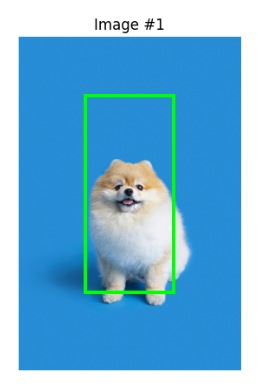

In [ ]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

x_min, y_min, x_max, y_max = [float(value.strip()) for value in message1.content.split(',')]

img = Image.open("dog.jpg")
width, height = img.size


tlX = int(x_min * width)
tlY = int(y_min * height)
brX = int(x_max * width)
brY = int(y_max * height)


draw = ImageDraw.Draw(img)
draw.rectangle([tlX, tlY, brX, brY], outline="Lime", width=4)

plt.imshow(img)
plt.axis('off')
plt.show()